In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 
client_data = pd.read_csv("C:/Users/navir/Downloads/client_data (1).csv")
price_data = pd.read_csv("C:/Users/navir/Downloads/price_data (1).csv")
 
 
print("Customer Data:")
print(client_data.head())

print("\nPricing Data:")
print(price_data.head())

 

Customer Data:
                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.0

In [5]:
# Data types of each column
print("\nData Types of Client Data:")
print(client_data.dtypes)


 



Data Types of Client Data:
id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin

In [6]:
# Descriptive statistics
print("\nDescriptive Statistics of Client Data:")
print(client_data.describe())



Descriptive Statistics of Client Data:
           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289           

In [9]:
# Data types of each column
print("\nData Types of Price Data:")
print(price_data.dtypes)


Data Types of Price Data:
id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object


In [7]:
# Descriptive statistics
print("\nDescriptive Statistics of Price Data:")
print(price_data.describe())


Descriptive Statistics of Price Data:
       price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.

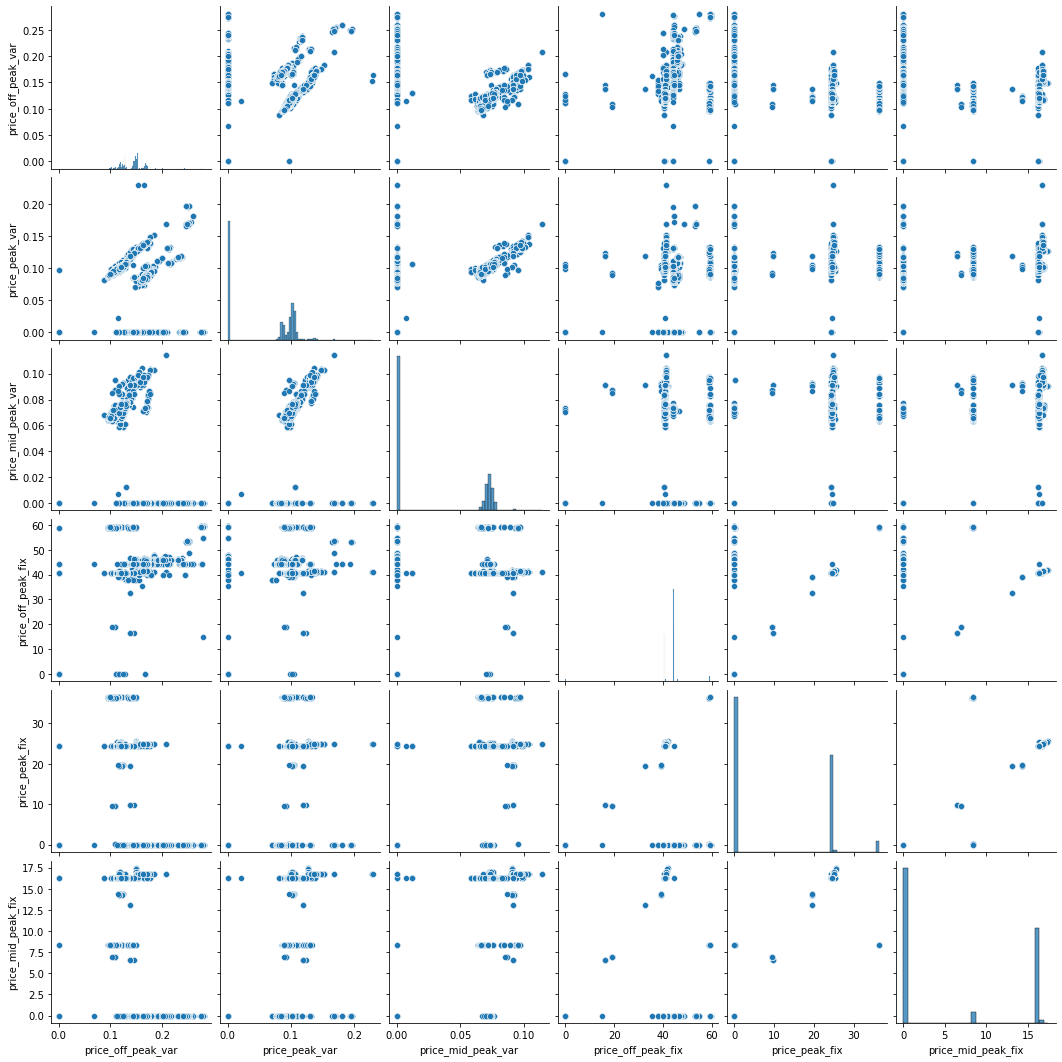

In [11]:
import seaborn as sns

# Select relevant numeric columns
numeric_columns = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',  'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix' ]

# Create a pairplot
sns.pairplot(price_data[numeric_columns])
plt.show()


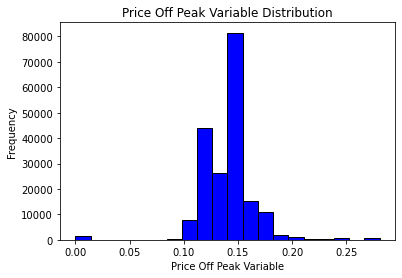

In [12]:
 
plt.hist(price_data['price_off_peak_var'], bins=20, color='blue', edgecolor='black')
plt.title('Price Off Peak Variable Distribution')
plt.xlabel('Price Off Peak Variable')
plt.ylabel('Frequency')
plt.show()


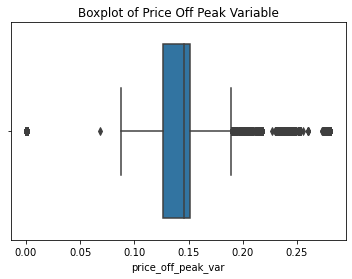

In [13]:
sns.boxplot(x=price_data['price_off_peak_var'])
plt.title('Boxplot of Price Off Peak Variable')
plt.show()


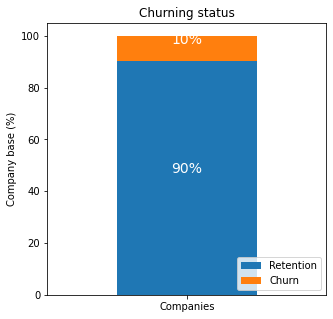

In [16]:
def annotate_stacked_bars(ax, textsize=14):
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.0f}%',
                        (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                        ha='center', va='center',
                        fontsize=textsize,
                        color='white',
                        xytext=(0, 9),
                        textcoords='offset points')

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

churn = client_data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")